* Import Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay, roc_curve, auc

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as ltb
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
from joblib import dump, load

* Load dataset
* Drop null values
* Check correlation

In [2]:
data = pd.read_csv("Training_ponds.csv")
data = data.dropna()
data.head()

,POINT_X,POINT_Y,TWI,Slope,Distance,LST,NDVI,SMI,Classes
0,623892.3228,1391762.381,9.024129,1.414214,1552.350220,29.084775,0.211289,0.317259,0
1,620769.1173,1392171.210,8.869978,3.162278,3833.187744,26.364167,0.176200,0.490701,0
2,623033.4832,1392150.318,15.768539,4.472136,2395.116211,29.137597,0.312511,0.313891,0
3,625025.0659,1392405.491,12.524527,4.242641,1053.057617,26.909370,0.216120,0.455943,0
4,619815.2906,1388373.495,8.341083,4.000000,851.510376,24.563510,0.091370,0.605495,0


In [3]:
data.isnull().sum()

POINT_X     0
POINT_Y     0
TWI         0
Slope       0
Distance    0
LST         0
NDVI        0
SMI         0
Classes     0
dtype: int64

In [4]:
data.corr()

,POINT_X,POINT_Y,TWI,Slope,Distance,LST,NDVI,SMI,Classes
POINT_X,1.000000,-0.300881,0.143663,-0.262931,0.180003,0.249580,-0.054600,-0.249580,-0.215491
POINT_Y,-0.300881,1.000000,0.163976,-0.354085,0.586512,0.025086,0.351339,-0.025086,-0.603169
TWI,0.143663,0.163976,1.000000,-0.374349,0.241543,0.048580,0.098494,-0.048580,-0.260860
Slope,-0.262931,-0.354085,-0.374349,1.000000,-0.292025,-0.036928,-0.260156,0.036928,0.383789
Distance,0.180003,0.586512,0.241543,-0.292025,1.000000,0.183836,0.135357,-0.183836,-0.811228
LST,0.249580,0.025086,0.048580,-0.036928,0.183836,1.000000,-0.210489,-1.000000,-0.169893
NDVI,-0.054600,0.351339,0.098494,-0.260156,0.135357,-0.210489,1.000000,0.210489,-0.285664
SMI,-0.249580,-0.025086,-0.048580,0.036928,-0.183836,-1.000000,0.210489,1.000000,0.169893
Classes,-0.215491,-0.603169,-0.260860,0.383789,-0.811228,-0.169893,-0.285664,0.169893,1.000000


* Drop unecessary columns
* Split Dataset

In [5]:
target = "Classes"
y = data[target]
X = data.drop(columns = ["POINT_X", "POINT_Y", target])
# le = LabelEncoder()
# y = le.fit_transform(y)

# cutoff = int(len(X) * 0.8)

# X_train, y_train = X.iloc[:cutoff], y.iloc[:cutoff]
# X_test, y_test = X.iloc[cutoff:], y.iloc[cutoff:]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.20, random_state = 7)

X_train.isnull().sum()

TWI         0
Slope       0
Distance    0
LST         0
NDVI        0
SMI         0
dtype: int64

In [6]:
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Naive Bayes', GaussianNB()),
    ('XGBoost', XGBClassifier()),
    # ('Cat Boost', CatBoostClassifier())
    ('Random Forest', RandomForestClassifier()),
    # ('SVM', SVC()),
    # ('Gradient', GradientBoostingClassifier())
]

# Evaluate each classifier using cross-validation
results = []
for name, clf in classifiers:
    y_pred = cross_val_predict(clf, X, y, cv = 3)
    cm = confusion_matrix(y, y_pred)
    tn, fp, fn, tp = cm.ravel()
    print(f'Classifier: {name}')
    print(f'Confusion matrix:\n{cm}')
    print(f'True negatives: {tn}')
    print(f'False positives: {fp}')
    print(f'False negatives: {fn}')
    print(f'True positives: {tp}')
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, pos_label = 1)
    recall = precision_score(y, y_pred, pos_label = 1)
    f1 = f1_score(y, y_pred, pos_label = 1)
    roc_auc = roc_auc_score(y, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'recall: {recall:.2f}')
    print(f'F1 score: {f1:.2f}')
    print(f'ROC AUC Score: {roc_auc:.3f}')
    print()
    
    

D:\AI\Python\Virtual_Environments\Learning_Lab\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\AI\Python\Virtual_Environments\Learning_Lab\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

Classifier: Logistic Regression
Confusion matrix:
[[1298   60]
 [  26 1326]]
True negatives: 1298
False positives: 60
False negatives: 26
True positives: 1326
Accuracy: 0.97
Precision: 0.96
recall: 0.96
F1 score: 0.97
ROC AUC Score: 0.968

Classifier: Naive Bayes
Confusion matrix:
[[1306   52]
 [  99 1253]]
True negatives: 1306
False positives: 52
False negatives: 99
True positives: 1253
Accuracy: 0.94
Precision: 0.96
recall: 0.96
F1 score: 0.94
ROC AUC Score: 0.944

Classifier: XGBoost
Confusion matrix:
[[1331   27]
 [  67 1285]]
True negatives: 1331
False positives: 27
False negatives: 67
True positives: 1285
Accuracy: 0.97
Precision: 0.98
recall: 0.98
F1 score: 0.96
ROC AUC Score: 0.965

Classifier: Random Forest
Confusion matrix:
[[1327   31]
 [  96 1256]]
True negatives: 1327
False positives: 31
False negatives: 96
True positives: 1256
Accuracy: 0.95
Precision: 0.98
recall: 0.98
F1 score: 0.95
ROC AUC Score: 0.953



D:\AI\Python\Virtual_Environments\Learning_Lab\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\AI\Python\Virtual_Environments\Learning_Lab\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

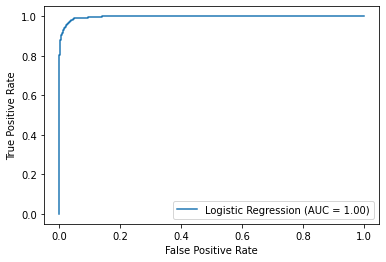

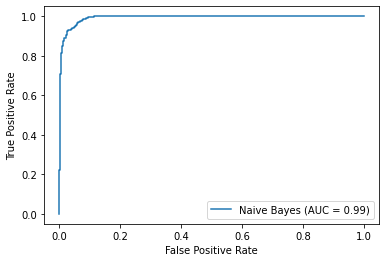

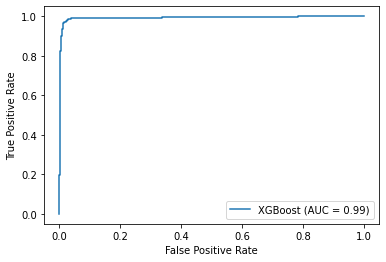

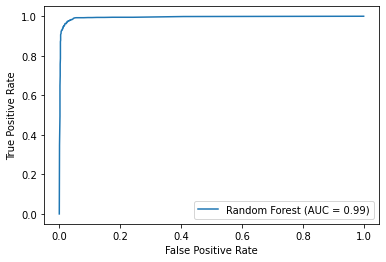

In [7]:
for name, clf in classifiers:
    y_pred = cross_val_predict(clf, X, y, cv = 10, method = 'predict_proba')
    fpr, tpr, thresholds = roc_curve(y, y_pred[:, 1])
    roc_auc = auc(fpr, tpr)
    # plot ROC curve
    disp = RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = name)
    disp.plot()

* Prediction with best model

In [8]:
test = pd.read_csv("test_ponds.csv")
test.head(4)

,OBJECTID,CID,POINT_X,POINT_Y,TWI,Slope,Distance,LST,NDVI,SMI
0,1,0,631148.906618,1.376426e+06,18.745026,4.000000,NaN,28.427587,0.054657,0.359155
1,2,0,628782.307329,1.377259e+06,4.632293,11.401754,NaN,27.294042,0.123436,0.431420
2,3,0,631940.294423,1.378194e+06,11.022104,5.656854,146.032822,26.649786,0.153273,0.472492
3,4,0,629427.479844,1.373872e+06,12.833458,5.830952,146.032822,25.923172,0.132839,0.518815


In [9]:
test = test.dropna()
test.isnull().sum()

OBJECTID    0
CID         0
POINT_X     0
POINT_Y     0
TWI         0
Slope       0
Distance    0
LST         0
NDVI        0
SMI         0
dtype: int64

In [10]:
POINT_X = test.POINT_X
POINT_Y = test.POINT_Y
TWI = test.TWI
Slope = test.Slope
Distance = test.Distance
LST = test.LST
NDVI = test.NDVI
SMI = test.SMI

test = test.drop(['OBJECTID', 'CID', 'POINT_X', 'POINT_Y'], axis = 1)
test.head(4)

,TWI,Slope,Distance,LST,NDVI,SMI
2,11.022104,5.656854,146.032822,26.649786,0.153273,0.472492
3,12.833458,5.830952,146.032822,25.923172,0.132839,0.518815
7,7.078219,4.472136,206.521591,23.512220,0.280654,0.672516
14,11.225244,5.099019,326.539307,26.259768,0.173807,0.497356


In [11]:
XGB = XGBClassifier()
XGB.fit(X, y)

tof = XGB.predict(test)
tof

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,

* Rearranging the test data

In [12]:
POINT_X = POINT_X.values
POINT_Y = POINT_Y.values
TWI = TWI.values
Slope = Slope.values
Distance = Distance.values
LST = LST.values
NDVI = NDVI.values
SMI = SMI.values

text = {'POINT_X': POINT_X, 'POINT_Y': POINT_Y, 'TWI': TWI, 'Slope': Slope, 'Distance': Distance, 'LST': LST, 'NDVI': NDVI, 'SMI': SMI, 'Class': tof}

text = pd.DataFrame(text)
text.describe()

,POINT_X,POINT_Y,TWI,Slope,Distance,LST,NDVI,SMI,Class
count,605.000000,6.050000e+02,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000
mean,637415.542619,1.377767e+06,8.801755,5.376905,588.375060,26.192389,0.164363,0.501652,0.763636
std,10228.365388,7.199485e+03,3.096074,2.640358,553.142780,1.097699,0.071589,0.069980,0.425200
min,615675.624471,1.363094e+06,4.407530,1.414214,146.032822,20.831449,-0.037045,0.289243,0.000000
25%,630147.201111,1.372852e+06,5.979607,4.000000,146.032822,25.675506,0.114600,0.465917,1.000000
50%,637574.216290,1.378170e+06,7.882938,4.472136,292.065643,26.281383,0.148801,0.495978,1.000000
75%,645729.748722,1.383632e+06,11.512925,7.071068,851.510376,26.752930,0.199204,0.534604,1.000000
max,656583.317419,1.396487e+06,20.639763,18.867962,2644.766846,29.524234,0.525010,0.843418,1.000000


In [13]:
text.to_csv("Classified_larva.csv")